# DD2412 Final Project - Basic Implementation MNIST


In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd drive/MyDrive/Github/AdvanceDL_Poject_Group9/
except:
    print("Unable to connect to google drive")

Unable to connect to google drive


In [2]:
# Import general packages
import os
import copy
import matplotlib.pyplot as plt
import numpy as np

# Variables
%matplotlib inline

In [3]:
# Tensorflow versions
import tensorflow as tf

# Handle not pre-installed packages 
try: 
    import tensorflow_addons as tfa
except:
    os.system("pip install tensorflow-addons")
    import tensorflow_addons as tfa

try: 
    import optuna
except:
    os.system("pip install optuna")
    import optuna

# Print TensorFlow versions
print("TensorFlow version:", tf.__version__)
print("TensorFlow Addon version:", tfa.__version__)

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


TensorFlow version: 2.11.0
TensorFlow Addon version: 0.18.0


In [4]:
import self_classifier as sc

## Config

In [5]:
# Create config variable
config = {
    # Data Parameter
    'DATASET' : tf.keras.datasets.cifar100,
    'IMAGE_SHAPE' : (32,32,3),
    'IMAGE_SIZE' : 32, 
    'BATCH_SIZE' : 64,
    'CLASS_COUNT' : 100,
    'N_AUG' : 2,
    # Training parameters
    'LR_SCHED' : "WarmUpCosineDecay",
    'OPTIM' : tf.keras.optimizers.Adam(),
    'EPOCHS' : 100,
    'MAX_LR' : 0.005,
}

## Data Loading and Augmentation

In [6]:
train_loader = sc.DataLoader(
    in_path="datasets/cifar100/ResNet50_{}_{}/train".format(config['BATCH_SIZE'], config['N_AUG']), mkdir=True)
train_ds = train_loader.get_train(config=config, pre_process=preprocess_input)

Generating new test augmentation dataset...
 => augment 1 complete
 => augment 2 complete
Saving new train dataset...[done]


In [7]:
test_loader = sc.DataLoader(
        in_path="datasets/cifar100/ResNet50_{}_{}/test".format(config['BATCH_SIZE'], config['N_AUG']), mkdir=True)
test_ds = test_loader.get_test(config=config, pre_process=preprocess_input)

Generating new test augmentation dataset...
 => augment 1 complete
 => augment 2 complete
Saving new test dataset...[done]


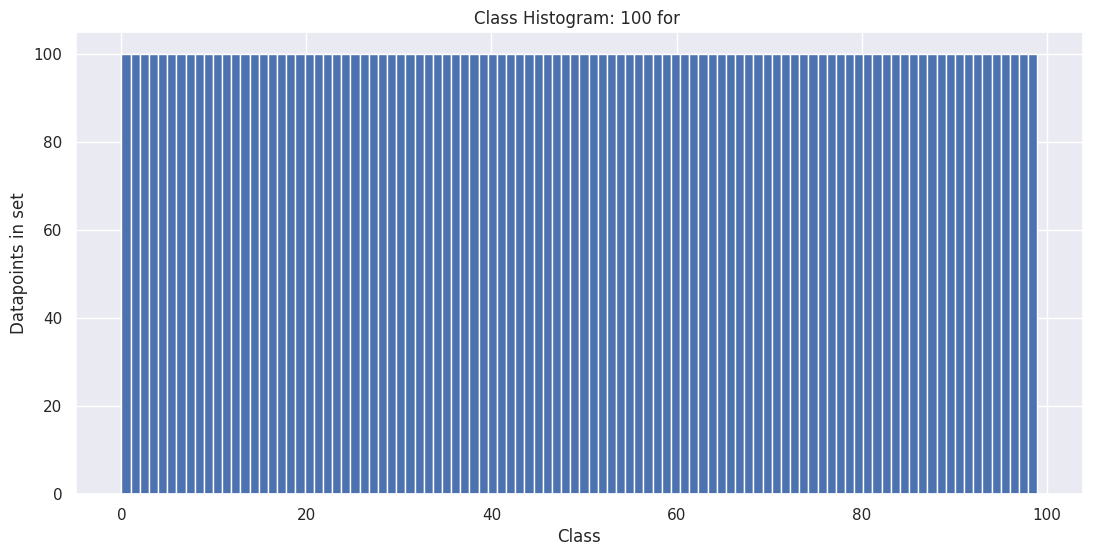

(100,
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
        78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
        91., 92., 93., 94., 95., 96., 97., 98., 99.]),
 array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 

In [8]:
true_labels = np.array([])
for images in test_ds:
    true_labels = np.concatenate((true_labels, images[-1].numpy().reshape(-1)))

sc.class_histogram(true_labels)

In [9]:
def check_augmentation(ds, columns=3):
    # Get random samples from test set
    
    # Training loop
    for images in train_ds:
        break
        
    aug_cnt = len(images)
    img_cnt = images[0].shape[0]
    samples = np.random.randint(img_cnt, size=columns)
    print(aug_cnt)
    print(img_cnt)
    print(len(samples))
    
    plt.figure(figsize=(10*aug_cnt, 10*columns))
    for i in range(aug_cnt):
        for j in range(columns):
            plt.subplot(aug_cnt, columns, (i*columns+j+1))
            imgplot = plt.imshow(images[i][samples[j], :, :, :])



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3
64
3


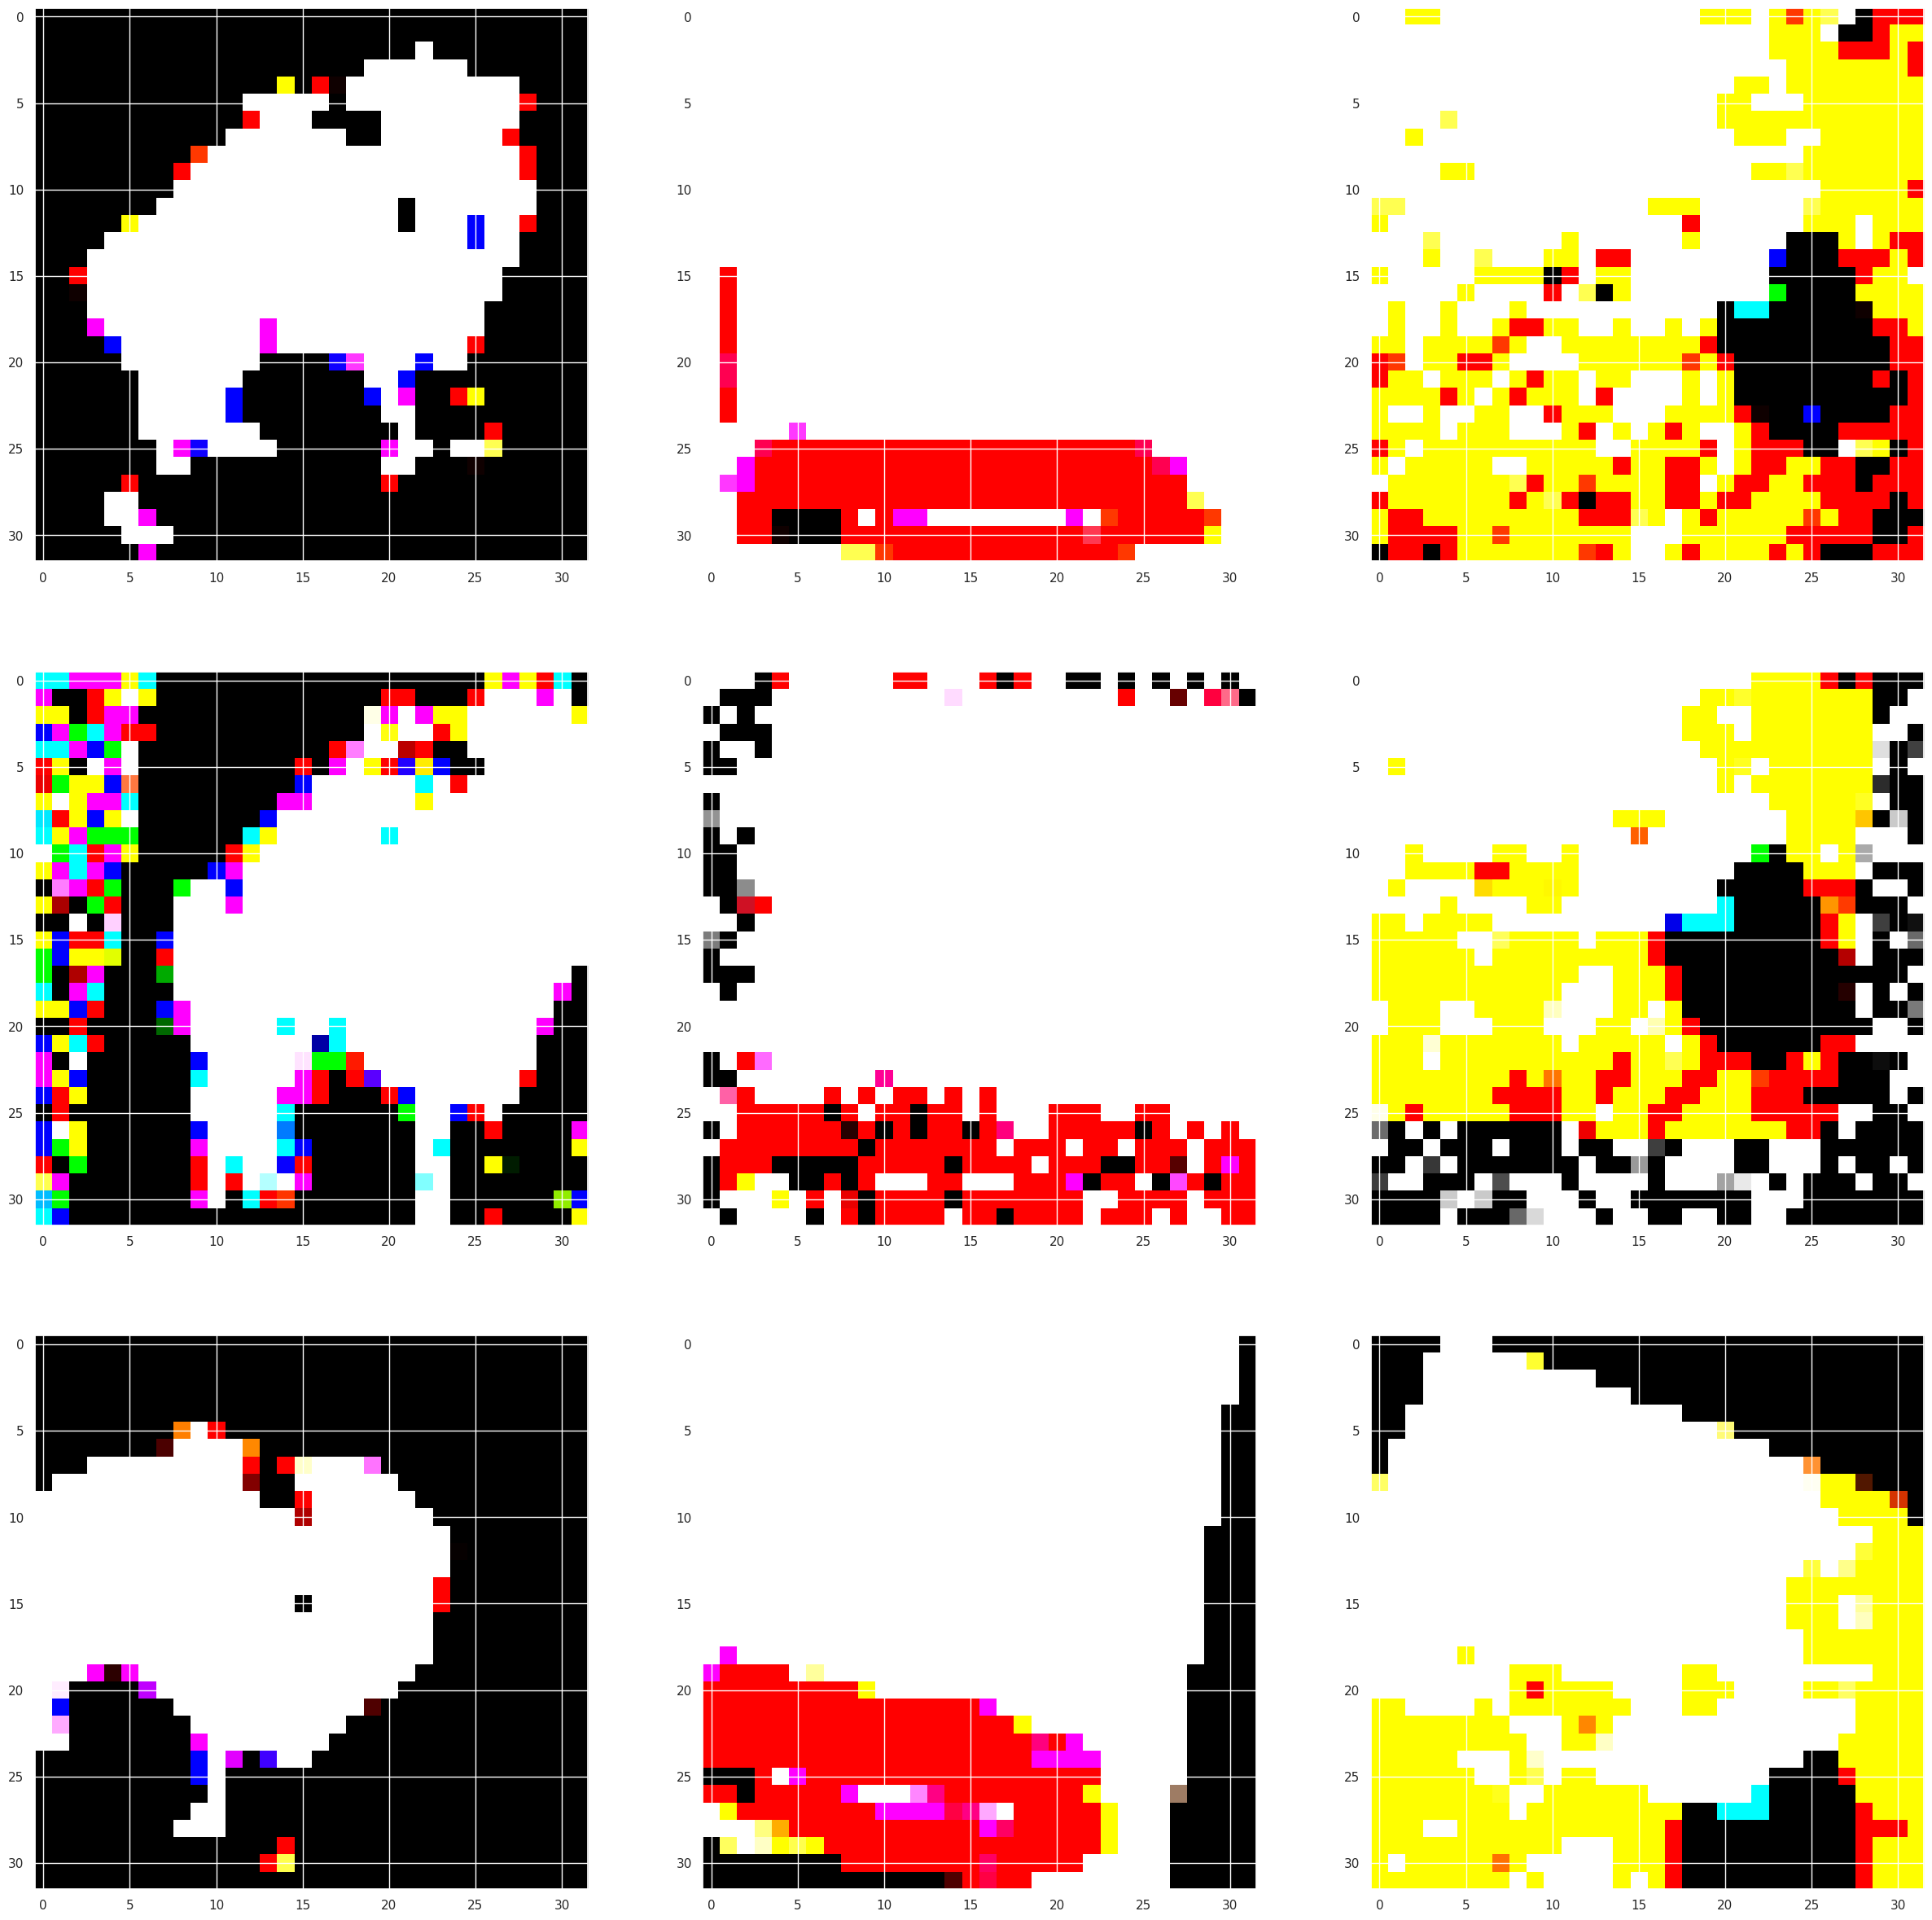

In [10]:
check_augmentation(train_ds)

In [11]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization,InputLayer
from tensorflow.keras.layers import UpSampling2D, GlobalAveragePooling2D
from tensorflow.keras.activations import softmax
from tensorflow.keras import Model, Sequential


class PretrainedModel(sc.CustomModel):
    def __init__(self, pre_model, activation, input_shape, output_shape):
        super(PretrainedModel, self).__init__()

        if pre_model == "ResNet50":
            base_model = tf.keras.applications.resnet50.ResNet50(
                weights='imagenet', include_top=False,
                input_shape=(224,224,3))

        elif pre_model == "EfficientNetB0":
            base_model = tf.keras.applications.efficientnet.EfficientNetB0(
                weights='imagenet', include_top=False,
                input_shape=input_shape)

        elif pre_model == "EfficientNetB1":
            base_model = tf.keras.applications.efficientnet.EfficientNetB1(
                weights='imagenet', include_top=False,
                input_shape=input_shape)

        elif pre_model == "MobileNet":
            base_model = tf.keras.applications.mobilenet.MobileNet(
                weights='imagenet', include_top=False,
                input_shape=input_shape)

        for layer in base_model.layers:
            if isinstance(layer, BatchNormalization):
                layer.trainable = True
            else:
                layer.trainable = False

        # Output layer
        model = Sequential()
        model.add(UpSampling2D(size=(7,7)))

        model.add(base_model)
        
        model.add(GlobalAveragePooling2D())
        model.add(Dense(256, activation=activation))
        model.add(Dropout(.25))
        model.add(BatchNormalization())
        model.add(Dense(output_shape, activation='softmax'))

        self.model = model


## Train Network

In [12]:
def training_run():
    # Create a data recorder and fit the data
    recorder = sc.DataRecorder()

    # Instansiate loss function
    loss_object_test = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    # Instansiate SelfClassifier loss function
    loss_object_train = sc.SelfClassifier(n_batch=config['BATCH_SIZE'], 
                        n_class=config['CLASS_COUNT'], t_r=0.1, t_c=0.05)
    # Instansiate optimizer 
    optimizer = config['OPTIM']
    decay_steps = len(train_ds)*config['EPOCHS']
    optimizer.learning_rate = tf.keras.optimizers.schedules.CosineDecay(
        0.005, decay_steps, alpha=0.0, name=None
    )

    #optimizer.learning_rate = sc.lr_schedular(config, config['LR_SCHED'],len(train_ds))
    
    # Select backbone 
    backbone = "ResNet50"
    activation = "selu"

    # Create an instance of the model
    model = PretrainedModel(pre_model=backbone,
                             activation=activation,
                             input_shape=config['IMAGE_SHAPE'],
                             output_shape=config['CLASS_COUNT'])

    learner = sc.UnderSupervisedLearner(model=model, optimizer=optimizer,
                                 loss_object_train=loss_object_train,
                                 loss_object_test=loss_object_test,
                                 recorder=recorder)
    # Train the model
    return learner.fit(config=config, train_ds=train_ds,
                       test_ds=test_ds, plot_every=5)

In [13]:
training_run()

============================== EPOCH 1 ==============================


Training:   0%|          | 0/782 [00:00<?, ?it/s]

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Training:   0%|          | 0/782 [00:37<?, ?it/s]


ResourceExhaustedError: Graph execution error:

Detected at node 'pretrained_model/sequential/resnet50/conv1_conv/Conv2D_1' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.8/dist-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelapp.py", line 505, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.8/dist-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 687, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 740, in _run_callback
      ret = callback()
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 821, in inner
      self.ctx_run(self.run)
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 782, in run
      yielded = self.gen.send(value)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 378, in dispatch_queue
      yield self.process_one()
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 250, in wrapper
      runner = Runner(ctx_run, result, future, yielded)
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 748, in __init__
      self.ctx_run(self.run)
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 782, in run
      yielded = self.gen.send(value)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 540, in execute_request
      self.do_execute(
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py", line 294, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-13-e8f6010ec167>", line 1, in <module>
      training_run()
    File "<ipython-input-12-df382f9f6dc4>", line 34, in training_run
      return learner.fit(config=config, train_ds=train_ds,
    File "/tf/own/AdvanceDL_Poject_Group9/self_classifier/learn.py", line 101, in fit
      loss = self.train_step(a1, a2)
    File "/tf/own/AdvanceDL_Poject_Group9/self_classifier/learn.py", line 48, in train_step
      s2 = self.model(a2, training=True)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/tf/own/AdvanceDL_Poject_Group9/self_classifier/model.py", line 10, in call
      return self.model(x)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/layers/convolutional/base_conv.py", line 283, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/usr/local/lib/python3.8/dist-packages/keras/layers/convolutional/base_conv.py", line 255, in convolution_op
      return tf.nn.convolution(
Node: 'pretrained_model/sequential/resnet50/conv1_conv/Conv2D_1'
OOM when allocating tensor with shape[64,64,112,112] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node pretrained_model/sequential/resnet50/conv1_conv/Conv2D_1}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_fn_with_cond_25533]

In [ ]:
Epoch 100, Learning Rate: 0.00000, Epoch time: 44.60 seconds
Loss: 2.949, Valid Loss: 3.2299, NMI: 0.7990, AMI: 0.0597, ARI: 0.0467, ACC: 0.4341, 

In [ ]:
Epoch 100, Learning Rate: 0.00000, Epoch time: 45.32 seconds
Loss: 3.044, Valid Loss: 3.3234, NMI: 0.7902, AMI: 0.0507, ARI: 0.0381, ACC: 0.4162, 

## Run study

In [ ]:
def objective(trial):
    # Create a data recorder and fit the data
    recorder = sc.DataRecorder()
    
    # Instansiate loss function
    loss_object_test = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    # Instansiate SelfClassifier loss function
    loss_object_train = sc.SelfClassifier(n_batch=config['BATCH_SIZE'], 
                        n_class=config['CLASS_COUNT'], t_r=0.1, t_c=0.05)
    # Instansiate optimizer 
    optimizer = tf.keras.optimizers.Adam()
    decay_steps = len(train_ds)*config['EPOCHS']
    
    learning_rate = trial.suggest_float("learning_rate", 
                                  config['MAX_LR']*0.01, config['MAX_LR'])
    optimizer.learning_rate = tf.keras.optimizers.schedules.CosineDecay(
        learning_rate, decay_steps, alpha=0.0, name=None
    )
    
    # Select backbone 
    backbone = trial.suggest_categorical('backbone',[
        "ResNet50", "EfficientNetB0", "EfficientNetB1", "MobileNet"])
    activation = trial.suggest_categorical('activation', [
        "linear", "relu", "selu"])
    
    # Create an instance of the model
    model = sc.PretrainedModel(pre_model=backbone,
                               activation=activation,
                               input_shape=config['IMAGE_SHAPE'],
                               output_shape=config['CLASS_COUNT'])

    learner = sc.UnderSupervisedLearner(model=model, optimizer=optimizer,
                                 loss_object_train=loss_object_train,
                                 loss_object_test=loss_object_test,
                                 recorder=recorder)
    # Train the model
    return learner.fit(config=config, train_ds=train_ds,
                       test_ds=test_ds, plot_every=5)

In [ ]:
import logging
import sys
import optuna

# Add stream handler of stdout to show the messages
optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler(sys.stdout))
study_name = "cifar100-backbone-study"  # Unique identifier of the study.
storage_name = "sqlite:///studies/{}.db".format(study_name)
study = optuna.create_study(study_name=study_name, storage=storage_name, 
                            directions=["minimize", "maximize"],
                            load_if_exists=True)

In [ ]:
study.optimize(objective, n_trials=30)

## Plot Final Metrics

In [ ]:
print(f"Number of trials: {len(study.trials)}")

trial_with_smallest_loss = min(study.best_trials, key=lambda t: t.values[0])
print(f"Trial with smallest loss: ")
print(f"\tnumber: {trial_with_smallest_loss.number}")
print(f"\tparams: {trial_with_smallest_loss.params}")
print(f"\tvalues: {trial_with_smallest_loss.values}")
print()

trial_with_highest_accuracy = max(study.best_trials, key=lambda t: t.values[1])
print(f"Trial with highest accuracy: ")
print(f"\tnumber: {trial_with_highest_accuracy.number}")
print(f"\tparams: {trial_with_highest_accuracy.params}")
print(f"\tvalues: {trial_with_highest_accuracy.values}")

In [ ]:
optuna.visualization.plot_pareto_front(study, target_names=["Loss", "Accuracy"])

In [ ]:
optuna.visualization.plot_param_importances(
    study, target=lambda t: t.values[0], target_name="Loss"
)

In [ ]:
optuna.visualization.plot_param_importances(
    study, target=lambda t: t.values[1], target_name="Accuracy"
)

In [ ]:
import plotly